# Cyber Security

**Problem Statement:**

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

The input dataset contains an 11k sample corresponding to the 11k URLs. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 -1: Phishing

 1: Legitimate

The sample could be either legitimate or phishing.

### Exploratory Data Analysis

In [73]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import time

import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
# Configure Logging System
logging.basicConfig(filename='cyberSecurity.log',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    level=logging.INFO)

In [75]:
# Import dataset 
df = pd.read_csv('dataset.csv')

In [76]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

There are 31 independent variables (integers) and one dependent variable (integers).

In [77]:
# Descriptive Statistics
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the data is scaled as it is either -1,0, or 1.

In [78]:
# Null Values
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

There are no missing values.

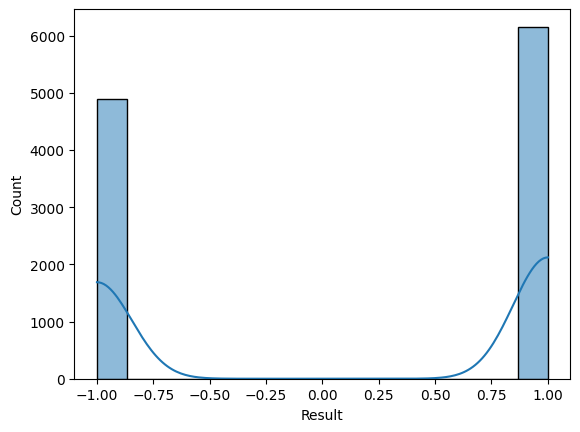

In [79]:
# Distribution of Results
sns.histplot(df['Result'],kde=True)
plt.show()

#### Dataset is balanced on the Result (groups)

In [80]:
# Find Correlation between columns
corr_matrix = df.corr()
# Find Correlation between features and Result
result_corr = corr_matrix[['Result']].sort_values(by='Result', ascending=False)

# Create a DataFrame from the result
result_corr_df = pd.DataFrame(result_corr)

# Display the correlation table
print(result_corr_df)

                               Result
Result                       1.000000
SSLfinal_State               0.714741
URL_of_Anchor                0.692935
Prefix_Suffix                0.348606
web_traffic                  0.346103
having_Sub_Domain            0.298323
Request_URL                  0.253372
Links_in_tags                0.248229
SFH                          0.221419
Google_Index                 0.128950
age_of_domain                0.121496
Page_Rank                    0.104645
having_IPhaving_IP_Address   0.094160
Statistical_report           0.079857
DNSRecord                    0.075718
URLURL_Length                0.057430
having_At_Symbol             0.052948
on_mouseover                 0.041838
port                         0.036419
Links_pointing_to_page       0.032574
Submitting_to_email          0.018249
RightClick                   0.012653
index                        0.000978
popUpWidnow                  0.000086
Favicon                     -0.000280
Iframe      

In [81]:
# Extract features
features = df[['SSLfinal_State', 'URL_of_Anchor', 'Prefix_Suffix', 'web_traffic']]

#### The threshold is 0.30 by testing between 0.30 and 0.60. Lowering the threshold and adding 'Prefix_Suffix' and 'web_traffic', the modeling improved in the logistical regression (ROC=0.95) and gradient boost classifier (ROC=0.96) to 0.96 and 0.98 respectively. This is still subjective based on iterations, further external research and domain specific knowledge will aid to provide a better acurate threshold.

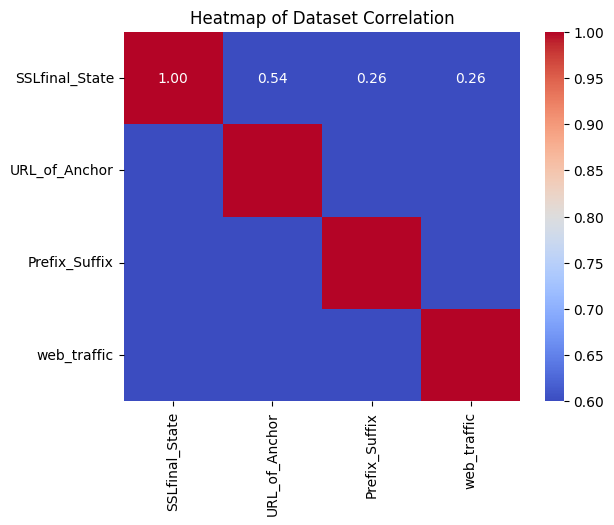

In [82]:
# Correlation of Columns
cor = features.corr()
# Visualize Correlations on a heatmap
sns.heatmap(cor, vmin=0.6, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Dataset Correlation")
plt.show()

#### Important to note that 0.6 as a correlation threshhold is subjective and a starting point to identify multicolinearity, as a more efficient threshhold would be utilized with external reseaerch and domain knowledge.

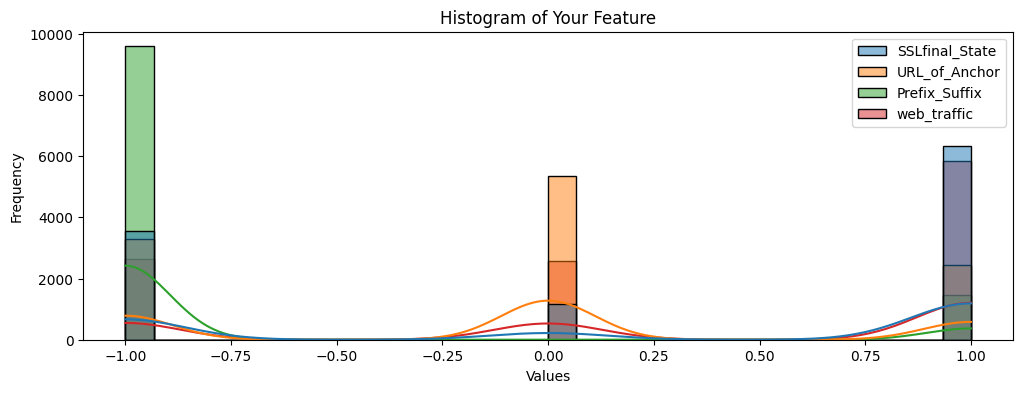

In [83]:
# Set the size of the plot
plt.figure(figsize=(12, 4))

# Create a histogram for a specific feature
sns.histplot(features, bins=30, kde=True)

# Add title and labels
plt.title('Histogram of Your Feature')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

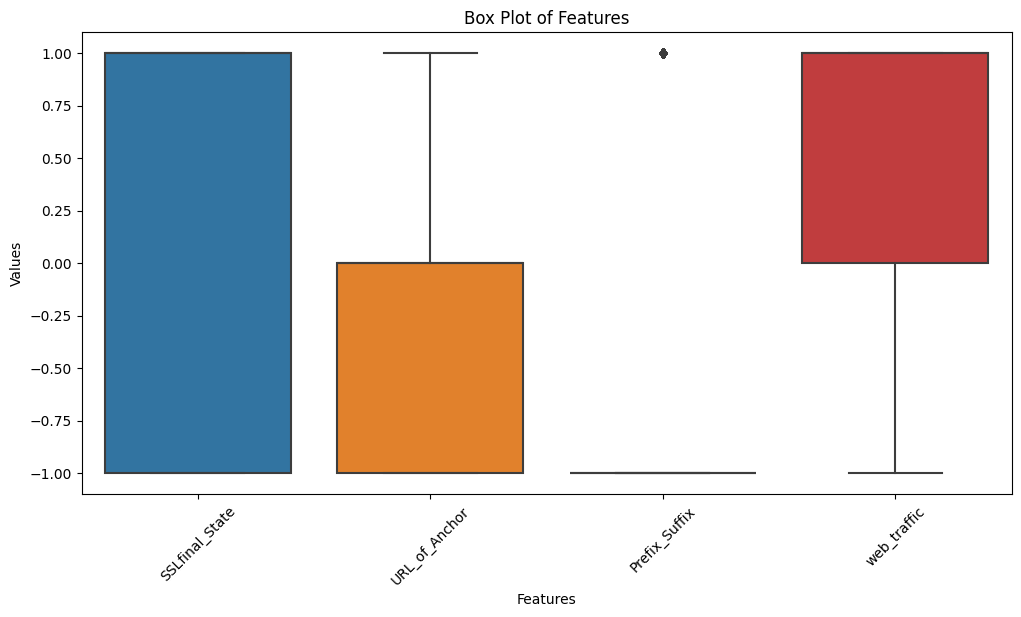

In [84]:
plt.figure(figsize=(12, 6))

# Create a box plot for all features
sns.boxplot(data=features)

# Add title and labels
plt.title('Box Plot of Features')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

In [85]:
features.describe()

,SSLfinal_State,URL_of_Anchor,Prefix_Suffix,web_traffic
count,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.250927,-0.076526,-0.734962,0.287291
std,0.911892,0.715138,0.678139,0.827733
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,0.000000,-1.000000,1.000000
75%,1.000000,0.000000,-1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### Feature Selection

In [86]:
# Create Variables
X = features
y = df['Result']

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
# Split data variables into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### Logistic Regression

This model is used to analyze independent variables and produce a binary outcome. In this model, the URLs are classified as 0 (Phishing) or 1 (Legitimate). This binary model uses maximum likelihood estimation to determine the probability distribution of the outcomes. If the predictive probability is above the threshold (0.5) then it is assigned to as a 1 and if the probability is below the threshold, it is assigned as 0. In this dataset, the values are already in a 0 or 1 form. 

##### Evaluation Metrics:

1. Accuracy Score - Measures how well the model fits by measuring the proportion of correclty classified to the total amount of samples.
2. Precision Score - Metric measuring proportion of correctly predicted positive samples out of the total samples predicted as positive.
3. Recall Score - Measures the true positive rate which is the proportion of the actual positive samples correctly identified. 
4. F1 Score - This is a combination of the precesion & recall scores that signifies both the accuracy and coverage of the model's performance.
5. Confusion Matrix - Table that describes the performance of the model by showing the predictions that are true positive, true negative, false positive, and false negative. 
6. ROC AUC Score - Performance metric to evaluate the model on how it distinguishes between positive and negative classes. The ROC curve shows the true positive rate against the false positive rate.

In [89]:
# Start time
start_logistical = time.time()

In [90]:
# Create Instance for Logistical Regression
log_reg = LogisticRegression()

In [91]:
# Fit the model unto the training data
model = log_reg.fit(X_train,y_train)

In [92]:
# Use model to run the testing data
y_pred = model.predict(X_test)

In [93]:
# End time
end_logistical = time.time()
# Caculate total time
total_time_logistical = end_logistical - start_logistical
# Log the time
logging.info(f"Logistic Regression run time: {total_time_logistical:.4f} seconds")

#### Evaluation Metrics

In [94]:
# Find accuracy score for model 
accuracy = accuracy_score(y_test, y_pred)
# Find precision score for model
precision = precision_score(y_test, y_pred)
# Find recall score for model
recall = recall_score(y_test, y_pred)
# Find F1 score for model
f1 = f1_score(y_test, y_pred)

print(f"Accuracy Scor: {accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F-Score: {f1}")

Accuracy Scor: 0.9128730780826048
Precision Score: 0.9060913705583756
Recall Score: 0.9449444150344097
F-Score: 0.9251101321585903


In [95]:
# Log results
logging.info(f"Accuracy for Logistical Regression: {accuracy}")
logging.info(f"F-Score for Logistical Regression: {accuracy}")

In [96]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a dataframe to better see the confusion matrix
cm_df = pd.DataFrame(cm, index=['Legitimate', 'Phishing'], columns=['Predicted Legitimate', 'Predicted Phishing'])
# Display
print(cm_df)

            Predicted Legitimate  Predicted Phishing
Legitimate                  1243                 185
Phishing                     104                1785


In [97]:
# Use the model to predict probabilities for the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [98]:

# Log ROC/AUC
logging.info(f"ROC/AUC Score for Logistical Regression: {roc_auc}")

In [99]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

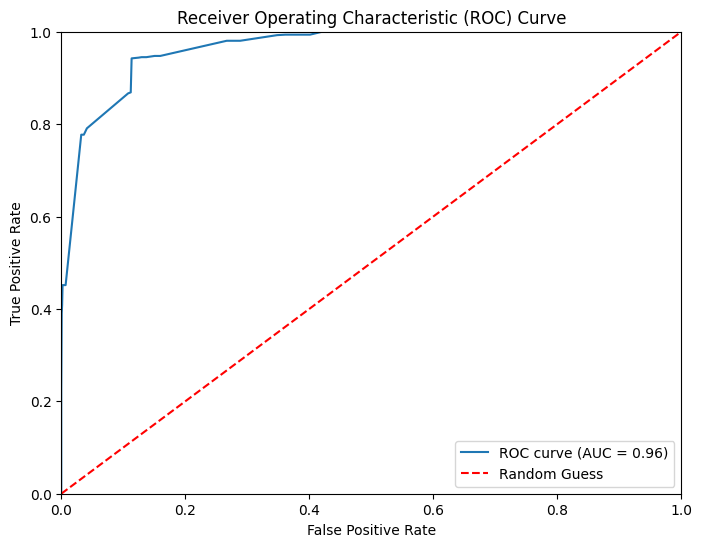

In [100]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Gradient Boosting Classifier

A powerful ensemble learning technique that uses boosting to sequentially create a series of models, where each model is designed to correct the mistakes made by the previous models.

Steps for Gradient Boosting Classifer:
1. Fit initial model
2. Calculate error residuals (predictive - actual values)
3. Fit new model based on error residuals
4. Update predictions by adding the previous predicitons to the new model predictions
5. Repeats steps 2-4 as many times as specified/desired

In [101]:
# Initialize random number generator
seed = 7
# Specify number of trees
num_trees = 100
# Create cross-validation and data will be split into 10 splits
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# model is created 
model1 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

##### Evaluation Metrics

1. Accuracy Score per Fold - Metric of how well the model performs on the subsets of data.
2. ROC_AUC - Performance metric to evaluate the model on how it distinguishes between positive and negative classes. The ROC curve shows the true positive rate against the false positive rate.
3. Confusion Matrix - Table that describes the performance of the model by showing the predictions that are true positive, true negative, false positive, and false negative. 
4. Feature Importance - Metric to identify which indpendent variables are the most significant to the model's predictions.

In [102]:
# Log start time
start_time_gradient = time.time()

In [103]:
# Obtain scores for each fold
results = model_selection.cross_val_score(model1, X, y, cv=kfold)

In [104]:
# Mean average accuracy for each fold
print(" Accuracy Score per Fold:",results.mean())

 Accuracy Score per Fold: 0.9210308232348441


In [105]:
# Fit model
model1 = model1.fit(X_train, y_train)

In [106]:
# End time
end_time_gradient = time.time()
# Calculate total time
total_time_gradient = end_time_gradient - start_time_gradient

In [107]:
# Log run time
logging.info(f"Gradient Boosting Classifier run time: {total_time_gradient:.4f} seconds")

In [108]:
# Extract y-values
y_scores = model1.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr_gradient, tpr_gradient, thresholds_gradient = roc_curve(y_test, y_scores)
# Calculate AUC
roc_auc_gradient = auc(fpr_gradient, tpr_gradient)

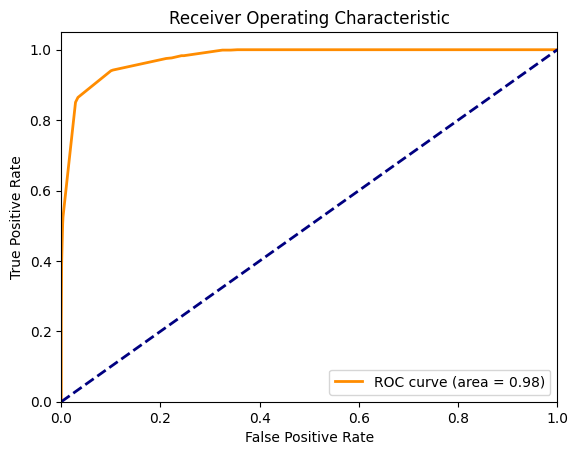

In [109]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_gradient, tpr_gradient, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gradient)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [110]:
# Create a confusion matrix
y_pred1 = model1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)

cm_df_gradient = pd.DataFrame(cm1, index=['Legitimate', 'Phishing'], columns=['Predicted Legitimate', 'Predicted Phishing'])
# Display
print(cm_df_gradient)

            Predicted Legitimate  Predicted Phishing
Legitimate                  1279                 149
Phishing                     109                1780


#### Compare Logistical vs Gradient Boosting

In [111]:
# Find Accuracy
accuracy_gradient = accuracy_score(y_test, y_pred1)
# Find precision score for model
precision_gradient = precision_score(y_test, y_pred1)
# Find recall score for model
recall_gradient = recall_score(y_test, y_pred1)
# Find F1 score for model
f1_gradient = f1_score(y_test, y_pred1)

In [112]:
logging.info(f"Accuracy Score for Gradient Boost: {accuracy_gradient}")
logging.info(f"F-Score Score for Gradient Boost: {f1_gradient}")
logging.info(f"ROC/AUC Score for Gradient Boost: {roc_auc_gradient}")

In [113]:
# Metrics for Logistic Regression
metrics_logistic = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Logistic Regression": [accuracy, precision, recall, f1, roc_auc],
}

# Performance metrics for Gradient Boosting
metrics_gradient = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Gradient Boosting": [accuracy_gradient, precision_gradient, recall_gradient, f1_gradient, roc_auc_gradient],
}

# Create dataframes
df_logistic = pd.DataFrame(metrics_logistic)
df_gradient = pd.DataFrame(metrics_gradient)

# Merge the two
comparison_df = pd.merge(df_logistic, df_gradient, on="Metric")

# Display the comparison table
print(comparison_df)

      Metric  Logistic Regression  Gradient Boosting
0   Accuracy             0.912873           0.922219
1  Precision             0.906091           0.922758
2     Recall             0.944944           0.942298
3   F1 Score             0.925110           0.932425
4    ROC AUC             0.964187           0.976816


### The Gradient Boosting is a bit better in all parameters (seen above)

### Conclusion

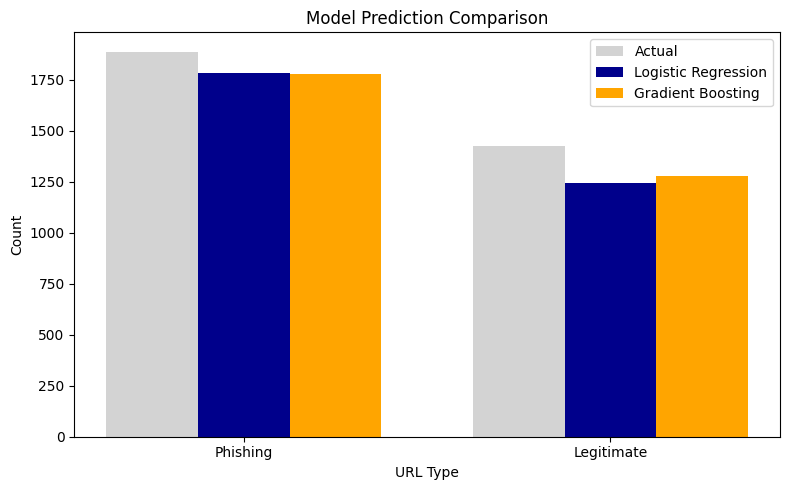

In [114]:
TP_logistic = cm[1, 1]  # True Positive
TN_logistic = cm[0, 0]  # True Negative

# Gradient Boosting
TP_gradient = cm1[1, 1]  # True Positive
TN_gradient = cm1[0, 0]  # True Negative

labels = ['Phishing', 'Legitimate']
total_counts = [TP_logistic + cm[1, 0], TN_logistic + cm[0, 1]]  # Total URLs
correct_counts = [TP_logistic, TN_logistic]  # Correctly Identified Counts

# Set up bar positions
x = np.arange(len(labels))
bar_width = 0.25  # Width of the bars

plt.figure(figsize=(8, 5))

# Bars for total counts
plt.bar(x - bar_width, total_counts, width=bar_width, label='Actual', color='lightgray')
plt.bar(x, correct_counts, width=bar_width, label='Logistic Regression', color='darkblue')
plt.bar(x + bar_width, [TP_gradient, TN_gradient], width=bar_width, label='Gradient Boosting', color='orange')

# Add labels and title
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.title('Model Prediction Comparison')
plt.xticks(x, labels) 
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()